# Notebook Demonstration

In [6]:
! pip install git+https://github.com/Julien2048/GANs.git --quiet
! git clone https://github.com/Julien2048/GANs

In [6]:
from gan.gan import GANS
from gan.sampler import ODESampler, EulerMaruyamaSampler, EulerMaruyamaSamplerCorrector
from gan.score_based_model import ScoreNet
from gan.sde import SimpleSDE, VESDE, VPSDE


In [7]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Load DataSets

In [15]:
process = GANS(
    model = ScoreNet,
    sde = SimpleSDE(), # SimpleSDE, VPSDE or VESDE
    data_loader = 'FMNIST', # Choose between MNIST and FMNIST
    sampler = EulerMaruyamaSamplerCorrector(num_steps_cor=10), # Check sampler.py file
    device = 'cpu'
)

In [16]:
load = True # load = False to retrain the model
if load:
    process.load_model("coefs/FMNIST/SimpleSDE_F_100.pth")
else:
    process.train_model(n_epochs=50)
    process._plot_loss()

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


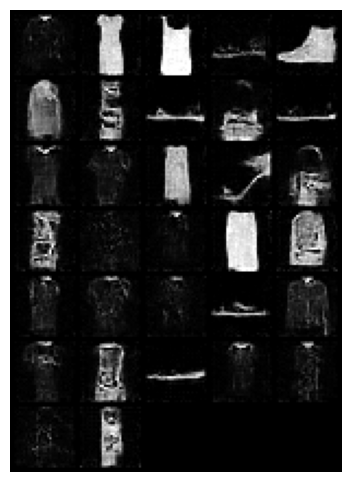

In [17]:
process.direct_sampling(32)
process.plot_samples()